## 📊 JagLine UX Performance Evaluation Report

### 🔍 Where Users Struggle (NER > 3)
Subtasks where novices struggled more than experts.

,Subtask,NER
3,4. Find all the routes that would take you to ...,12.388889
14,3. Turn on the notifications for that stop.,12.194805
6,1. Find stops that would take you near Riley C...,10.300000
2,3. Find timings on the purple line that would ...,10.156250
9,4. Find your preferred destination on the save...,9.688889
1,2. View only the purple line on the bus route ...,9.587500
0,1. Enable your current location.,6.565819
7,2. Save the route that gets you near Riley Chi...,5.198208
12,1. Choose your preferred route.,3.908951
13,2. Choose your preferred stop.,3.857547


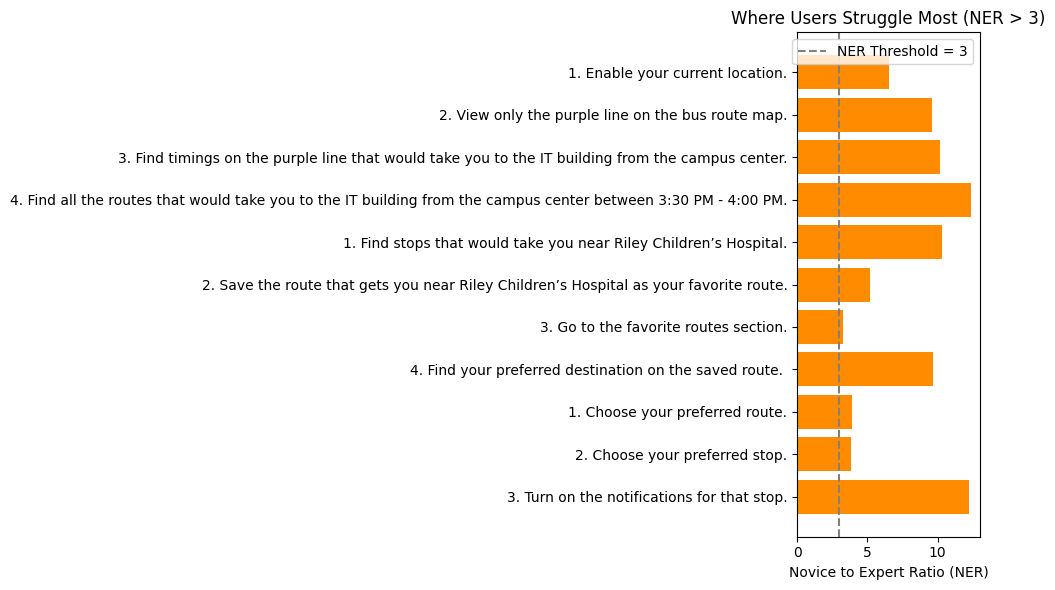

### ✅ Task Success Rates
Percentage of users completing each task successfully.

,Subtask,Success Rate (%)
0,1. Enable your current location.,22.2
1,2. View only the purple line on the bus route ...,44.4
2,3. Find timings on the purple line that would ...,22.2
3,4. Find all the routes that would take you to ...,33.3
4,1. Find stops that would take you near Riley C...,33.3
5,2. Save the route that gets you near Riley Chi...,44.4
6,3. Go to the favorite routes section.,88.9
7,4. Find your preferred destination on the save...,55.6
8,1. Choose your preferred route.,77.8
9,2. Choose your preferred stop.,55.6


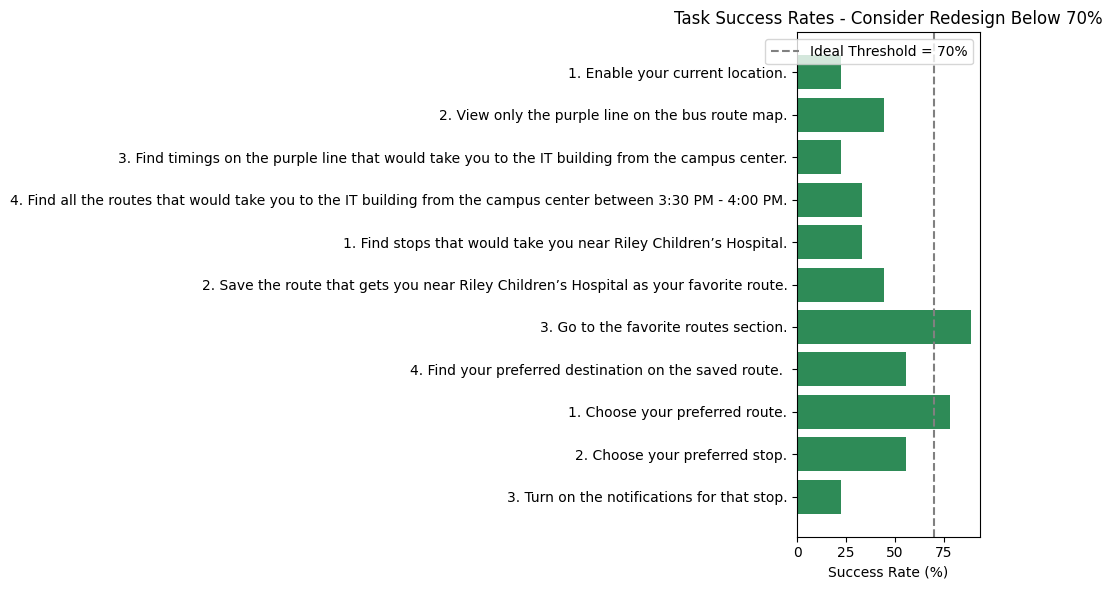

### 🧠 Tailored UX Recommendations
Based on NER and success rate thresholds.

,Subtask,Success Rate (%),NER,Recommended Action
0,1. Enable your current location.,22.2,6.57,"🟠 Moderate redesign: Clarify visuals, streamli..."
1,2. View only the purple line on the bus route ...,44.4,9.59,"🟠 Moderate redesign: Clarify visuals, streamli..."
2,3. Find timings on the purple line that would ...,22.2,10.16,🔴 Major redesign: Combine simplification with ...
3,4. Find all the routes that would take you to ...,33.3,12.39,🔴 Major redesign: Combine simplification with ...
4,1. Find stops that would take you near Riley C...,33.3,10.30,🔴 Major redesign: Combine simplification with ...
5,2. Save the route that gets you near Riley Chi...,44.4,5.20,"🟠 Moderate redesign: Clarify visuals, streamli..."
6,3. Go to the favorite routes section.,88.9,3.27,"🟡 Minor fix: Improve labeling, UI feedback, or..."
7,4. Find your preferred destination on the save...,55.6,9.69,"🟠 Moderate redesign: Clarify visuals, streamli..."
8,1. Choose your preferred route.,77.8,3.91,"🟡 Minor fix: Improve labeling, UI feedback, or..."
9,2. Choose your preferred stop.,55.6,3.86,"🟡 Minor fix: Improve labeling, UI feedback, or..."


In [7]:

# 🧠 JagLine UX Evaluation: Final Report Generator with Clean Visuals and Recommendations

# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

# ✅ Step 2: Load Excel File
file_path = '/content/IDM Data.xlsx'  # Upload this file in Colab
excel_file = pd.ExcelFile(file_path)
df_ner = excel_file.parse('Novice-Expert-Calculation')

# ✅ Step 3: Clean Data
df_clean = df_ner.copy()
df_clean.columns = [str(col).strip() for col in df_clean.columns]
df_clean = df_clean.dropna(subset=["Task: Finding the Bus Routes According to Your Class Schedule"])
df_clean = df_clean.rename(columns={
    "Task: Finding the Bus Routes According to Your Class Schedule": "Subtask",
    "Expert time (Avg time of expert users- Sec)": "Expert Avg Time",
    "Novice Time Avg (Avg time taken by 10 Particiants - Sec)": "Novice Avg Time",
    "Novice To Expert Ratio (Sec)": "NER"
})
df_clean["Expert Avg Time"] = pd.to_numeric(df_clean["Expert Avg Time"], errors='coerce')
df_clean["Novice Avg Time"] = pd.to_numeric(df_clean["Novice Avg Time"], errors='coerce')
df_clean["NER"] = pd.to_numeric(df_clean["NER"], errors='coerce')
df_clean = df_clean.dropna(subset=["NER"])

# ✅ Step 4: Success Rate Calculation
success_cols = [col for col in df_clean.columns if "Success/Failure" in col]
success_data = []
for idx, row in df_clean.iterrows():
    subtask = row["Subtask"]
    total = 0
    success = 0
    for col in success_cols:
        val = str(row[col]).strip().lower()
        if val in ["success", "failure"]:
            total += 1
            if val == "success":
                success += 1
    failure = total - success
    success_data.append({
        "Subtask": subtask,
        "Success Count": success,
        "Failure Count": failure,
        "Total": total,
        "Success Rate (%)": round((success / total) * 100, 1) if total else 0
    })

df_success = pd.DataFrame(success_data)

# ✅ Step 5: Tailored Recommendations Based on NER Severity
def get_recommendation(success_rate, ner):
    if success_rate < 40 and ner > 8:
        return "🔴 Major redesign: Combine simplification with onboarding/guidance"
    elif success_rate < 70 and ner > 5:
        return "🟠 Moderate redesign: Clarify visuals, streamline flow, add tooltips"
    elif ner > 3:
        return "🟡 Minor fix: Improve labeling, UI feedback, or next-step guidance"
    else:
        return "🟢 Step is usable"

design_recs = []
for _, row in df_success.iterrows():
    ner_val = df_clean.loc[df_clean["Subtask"] == row["Subtask"], "NER"].values[0]
    if row["Success Rate (%)"] < 70 or ner_val > 3:
        design_recs.append({
            "Subtask": row["Subtask"],
            "Success Rate (%)": row["Success Rate (%)"],
            "NER": round(ner_val, 2),
            "Recommended Action": get_recommendation(row["Success Rate (%)"], ner_val)
        })

df_design_actions = pd.DataFrame(design_recs)

# ✅ Step 6: Display Report in Pretty Markdown
display(Markdown("""## 📊 JagLine UX Performance Evaluation Report"""))
display(Markdown("""### 🔍 Where Users Struggle (NER > 3)
Subtasks where novices struggled more than experts."""))
display(df_clean[["Subtask", "NER"]].sort_values(by="NER", ascending=False))
# NER Chart
plt.figure(figsize=(10, 6))
plt.barh(df_clean["Subtask"], df_clean["NER"], color="darkorange")
plt.axvline(3, color='gray', linestyle='--', label="NER Threshold = 3")
plt.xlabel("Novice to Expert Ratio (NER)")
plt.title("Where Users Struggle Most (NER > 3)")
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


display(Markdown("""### ✅ Task Success Rates
Percentage of users completing each task successfully."""))
display(df_success[["Subtask", "Success Rate (%)"]])
# Success Rate Chart
plt.figure(figsize=(10, 6))
plt.barh(df_success["Subtask"], df_success["Success Rate (%)"], color="seagreen")
plt.axvline(70, color='gray', linestyle='--', label="Ideal Threshold = 70%")
plt.xlabel("Success Rate (%)")
plt.title("Task Success Rates - Consider Redesign Below 70%")
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()
display(Markdown("""### 🧠 Tailored UX Recommendations
Based on NER and success rate thresholds."""))
display(df_design_actions)

# ✅ Optional: Save Report as CSV
df_design_actions.to_csv('/content/JagLine_UX_Design_Recommendations.csv', index=False)
